# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [3]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

In [50]:
# Joost Visser's OpenML key
oml.config.apikey = '78f7e46e2a85fdc4766c4865c0849ba4'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, n_samples=1000, random_state=0)

### Part A
Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().

In [7]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    clf = svm.SVC(kernel=k)
    scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    mean_score = scores.mean()
    print("Kernel: {} Score: {}".format(k, mean_score))

Kernel: linear Score: 0.9936400000000001
Kernel: poly Score: 0.9928800000000001
Kernel: rbf Score: 0.9768000000000001


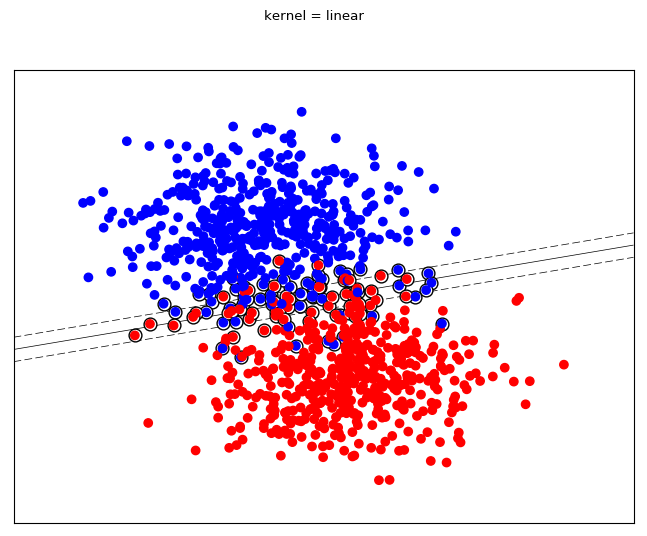

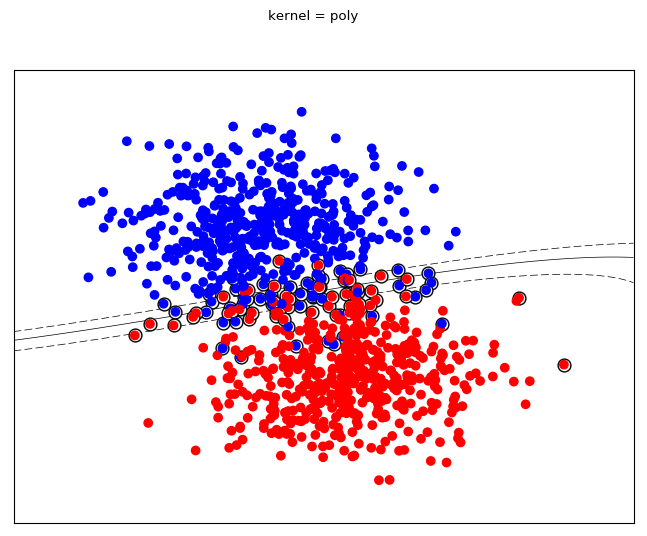

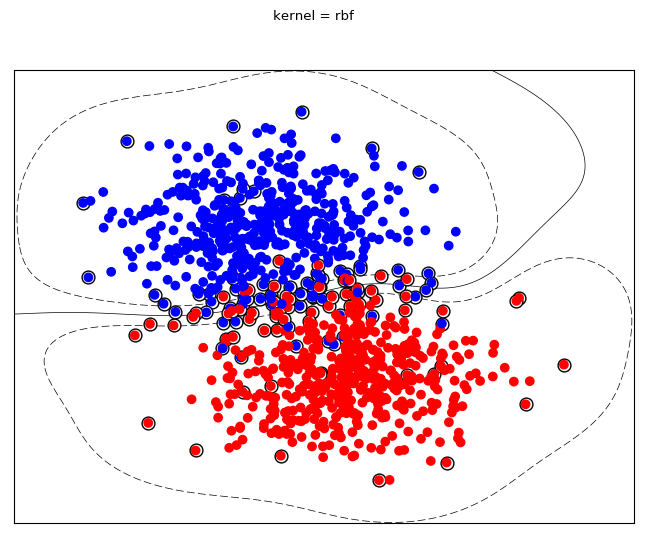

In [8]:
def plot_svm_kernels(X, Y):
    # figure number
    fignum = 1

    # fit the model
    for kernel in ('linear', 'poly', 'rbf'):
        clf = clf = svm.SVC(kernel=kernel)
        clf.fit(X, Y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(8, 6))
        plt.suptitle('kernel = %s' % kernel)

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=85, edgecolors='k', c='w', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.bwr)

#         for i, coef in enumerate(clf.dual_coef_[0]):
#             plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

        plt.axis('tight')
        x_min = np.min(X, axis=0)[0] - 1
        x_max = np.max(X, axis=0)[0] + 1
        y_min = np.min(X, axis=0)[1] - 1
        y_max = np.max(X, axis=0)[1] + 1

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()
     
plot_svm_kernels(X, y)

### Explanation
The linear and ploynomial kernel give the best result. The RBF kernel is a bit worse. When looking at the pictures a possible explanation can be seen. The data seems to be linear seperable, although there is some noise. The RBF kernel seems to be affected a bit more by the noise. 

### Part B
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.


C: 0.0009765625, gamma: 0.0009765625, support vectors: 1000, auc: 0.9934
C: 0.0009765625, gamma: auto, support vectors: 1000, auc: 0.9879200000000001
C: 0.0009765625, gamma: 1024, support vectors: 1000, auc: 0.96098


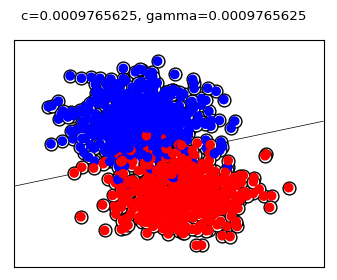

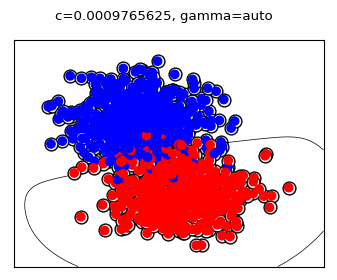

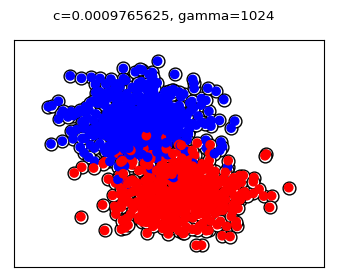

C: 1, gamma: 0.0009765625, support vectors: 394, auc: 0.99328
C: 1, gamma: auto, support vectors: 136, auc: 0.9768000000000001
C: 1, gamma: 1024, support vectors: 996, auc: 0.96112


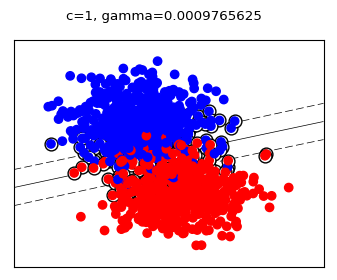

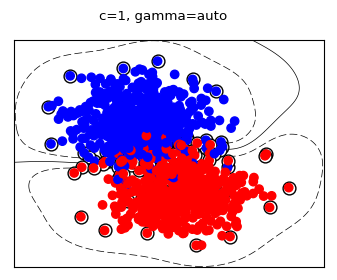

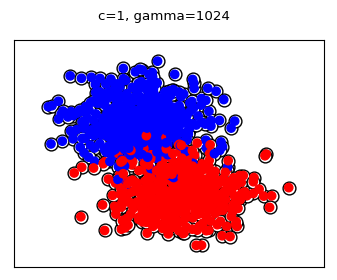

C: 1024, gamma: 0.0009765625, support vectors: 107, auc: 0.9935599999999999
C: 1024, gamma: auto, support vectors: 98, auc: 0.9894000000000002
C: 1024, gamma: 1024, support vectors: 995, auc: 0.96024


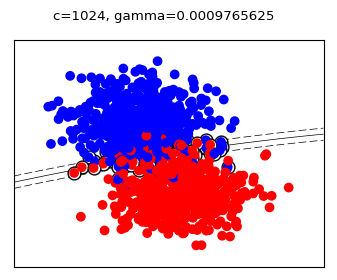

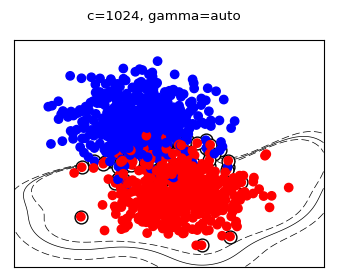

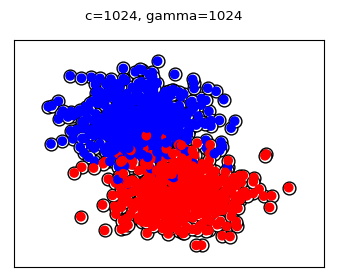

In [9]:
def plot_svm_kernel_params(X, Y):
    # figure number
    fignum = 1

    # fit the model
    for c in [2**-10, 1, 2**10]:
        for gamma in [2**-10, 'auto', 2**10]:
            clf = svm.SVC(kernel='rbf', C=c, gamma=gamma)
            # Calculating the scores using 10 ROC_AUC CV
            scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
            auc = scores.mean()
 
            clf.fit(X, Y)

            print("C: {}, gamma: {}, support vectors: {}, auc: {}".format(c, gamma, len(clf.support_vectors_), auc))

            # plot the line, the points, and the nearest vectors to the plane
            plt.figure(fignum, figsize=(4, 3))
            plt.suptitle('c={}, gamma={}'.format(c, gamma))

            plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                        s=85, edgecolors='k', c='w', zorder=10)
            plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.bwr)

#             for i, coef in enumerate(clf.dual_coef_[0]):
#                 plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

            plt.axis('tight')
            x_min = np.min(X, axis=0)[0] - 1
            x_max = np.max(X, axis=0)[0] + 1
            y_min = np.min(X, axis=0)[1] - 1
            y_max = np.max(X, axis=0)[1] + 1

            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(XX.shape)
            plt.figure(fignum, figsize=(8, 6))
            #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                        levels=[-.5, 0, .5])

            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)

            plt.xticks(())
            plt.yticks(())
            fignum = fignum + 1
        plt.show()

plot_svm_kernel_params(X, y)

### Results
When looking at the results, the gamma value seems to be the parameter that affects the end result the most. When we increase the gamma value, the AUC value seems to decrease. The figures show that if the gamma values are increased, the decision boundary gets more complex. Therefore it seems like the model starts to overfit.  When the C paramater is increased the AUC scores go down very slightly. The differences are too minor though to conclude that this leads to over or underfitting.

### Part C
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

In [38]:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC(kernel='rbf')
grid = {
    "C": [2**i for i in range(-20, 21, 2)],
    "gamma": [2**i for i in range(-20, 21,2)]
}

grid_search = GridSearchCV(estimator=clf, param_grid=grid, scoring='roc_auc')
grid_search = grid_search.fit(X, y)

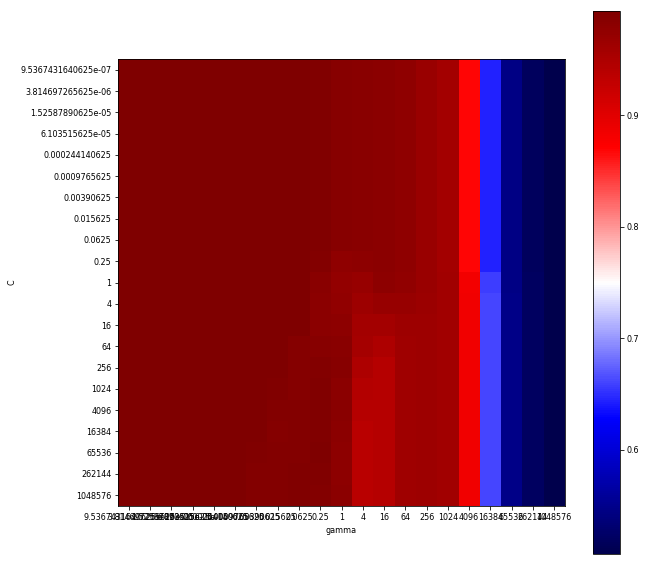

In [47]:
import matplotlib.cm as cm   
import matplotlib as mpl
from decimal import Decimal
from pandas import DataFrame

df = DataFrame(grid_search.cv_results_)

C = list(map(lambda x: x['C'], df['params']))
gamma = list(map(lambda y: y['gamma'], df['params']))

fig, ax = plt.subplots(figsize=(12,12))
score_array = np.array(grid_search.cv_results_['mean_test_score'])

arr = np.reshape(score_array, (len(grid['C']), len(grid['gamma'])), order='C')
im = ax.imshow(arr, cmap=plt.cm.seismic)

_ = ax.set_xticks(np.arange(arr.shape[1]), minor=False)
_ = ax.set_yticks(np.arange(arr.shape[0]), minor=False)
_ = ax.set_xticklabels(['%.1e' % Decimal(str(i)) for i in grid["gamma"]])
_ = ax.set_yticklabels(['%.1e' % Decimal(str(i)) for i in grid["C"]])
_ = ax.set_xlabel("gamma")
_ = ax.set_ylabel("C")

_ = fig.colorbar(im)
plt.show()

#### Elaboration
When the values of the gamma value increases the auc score seems to go down. There seems to be a sharp turning point at 4096 for the gamma value. After that the auc score goes down very quickly. In the previous part we have seen that the cause of this is that the SVM starts to overfit. 

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for AUC with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and AUC performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the training set to obtain a clean evaluation. Evaluate your optimized hyperparameter settings on the separate test set and discuss the result. Is the performance on the independent test set comparable with the result of the random search?
    - Hint: for the nested resampling, use at least a 10-fold CV for the outer loop. The inner loop can be a 3-fold CV or a simple holdout.
- Train an SVM using the optimal hyperparameter configuration you found and test it on the held out (20%) test set. Compare this AUC result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [5]:
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute);

### Part A
- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for AUC with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and AUC performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.

In [6]:
from sklearn.model_selection import train_test_split

# Making a stratified split using the train_test_split function.
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, stratify=y)
print("Train data size: {}, Test data size: {}".format(len(train_X), len(test_X)))

Train data size: 4364, Test data size: 1092


#### Hyperparameters note

For the hyperparameters, we did not add any dependencies to each other. The SVC allows us to do this, because it ignores all parameters that do not belong to the current kernel.

In [53]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC

params= {
    'kernel': ['linear', 'poly',    'rbf'],
    'C': [2**i for i in range(-20, 21, 2)],
    'gamma': [2**i for i in range(-20, 21, 2)],
    'degree': [i for i in range(2, 11)]
}

grid = RandomizedSearchCV(estimator=SVC(
    max_iter = 10000000
), param_distributions=params, scoring='accuracy', n_jobs=-1, random_state=0)
_ = grid.fit(train_X, train_y)

print(grid.best_score_)
print(grid.best_params_)

0.923464711274
{'gamma': 0.0009765625, 'C': 16384, 'degree': 5, 'kernel': 'rbf'}


### Part B
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the **whole** dataset to obtain a clean evaluation. What is the mean optimized performance? Is this in line with the optimized result of the random search of the previous question?

In [8]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC

params= {
    'kernel': ['linear', 'poly',    'rbf'],
    'C': [2**i for i in range(-20, 21, 2)],
    'gamma': [2**i for i in range(-20, 21, 2)],
    'degree': [i for i in range(2, 11)]
}

grid2 = RandomizedSearchCV(cv=3, estimator=SVC(
    max_iter = 10000000
), param_distributions=params, scoring='accuracy', n_jobs=-1, random_state=0)

scores = cross_val_score(grid2, X, y, cv=5)

print("Train score: {}".format(scores.mean()))

Train score: 0.8794419024302172


### Results
The train score is lower than only using random search. The reason for this is that the random search only does 3-fold cross validation:
- Only 66% from the training data of the outer cross validation is used for training. This, together with only 80% as it is inside a 5 CV, means that the models are trained on $66\% \cdot 80\% = 52.8\%$ of the total data. 
- In the previous part, $90\% \cdot 80\% = 72\%$ of the data was used for training. Thus, the previous part yields a better result.

### Question C
- Train an SVM using the optimal hyperparameter configuration you found and test it on the held out (20%) test set. Compare this AUC result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [68]:
from sklearn.metrics import accuracy_score
import pandas as pd

clf = SVC(**grid.best_params_)

_ = clf.fit(train_X, train_y)

predicted = clf.predict(test_X)

score = accuracy_score(test_y, predicted)

df = pd.DataFrame(grid.cv_results_)


print("Params: {}".format(grid.best_params_))
print("Score: {}".format(score))

print("Cross validation scores")
print(df['mean_test_score'])


Params: {'gamma': 0.0009765625, 'C': 16384, 'degree': 5, 'kernel': 'rbf'}
Score: 0.9258241758241759
Cross validation scores
0    0.40
1    0.90
2    0.92
3    0.57
4    0.40
5    0.71
6    0.40
7    0.62
8    0.74
9    0.74
Name: mean_test_score, dtype: float64


### Results
The score is much closer to the score of the 10 fold cross validation. When looking at the cross validation scores of the different parameters test in the grid search, we see that there is a big difference between the 10 tries. Therefore it seems that hyperparameter tuning is necessary. From the previous exercise we know tha the kernel and the gamma value affect the result the most. 

## A benchmark study (3 points (2+1))

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models.
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.
* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (don't overdo it). Does this affect the ranking of the algorithms?

### Part A
* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?

In [69]:
import openml
# Create a dict with all X, y values
datasets = dict([(k, openml.datasets.get_dataset(k)) for k in [37, 470, 1120, 1464,1471]])# 188, 470, 1464]])
for k in datasets:
    datasets[k] = datasets[k].get_data(target=datasets[k].default_target_attribute)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline

classifiers = [
    ('knn', KNeighborsClassifier()),
    ('rfc', RandomForestClassifier()),
    ('svm', SVC())
]

all_scores = {}

for i in datasets:
    all_scores[i] = {}
    X, y = datasets[i]
    for (clf_name, clf) in classifiers:        
        scores = cross_val_score(Pipeline([
            ('impute',  Imputer(missing_values='NaN')),
            ('scale', MinMaxScaler()),
            ('feature_selection', SelectPercentile(percentile=75)),
            ('clf', clf)
        ]), X, y, cv=10, scoring='roc_auc') #roc_auc doesn't deal with multiclass
        all_scores[i][clf_name] = scores

In [71]:
from pandas import DataFrame
from scipy.stats import wilcoxon

data = {
    'dataset': [],
    'knn_mean': [],
    'svm_mean': [],
    'rfc_mean': [],
    'svm_score': [],
    'knn_score': [],
    'rfc_score': []
}

clf_names = ['knn', 'rfc', 'svm']


for dataset in all_scores:
    data['dataset'].append(dataset)
    scores = all_scores[dataset]
    for c1 in clf_names:
        total_score = 0
        c1_scores = scores[c1]
        for c2 in clf_names:
            c2_scores = scores[c2]
            statistic, p_value = wilcoxon(c1_scores, c2_scores)
            if statistic == 0:
                continue # Exactly the same score
            
            # There is a significant difference
            if p_value < 0.05:
                if c1_scores.mean() < c2_scores.mean():
                    total_score -= 1
                else:
                    total_score += 1
        data[c1 + '_mean'].append(c1_scores.mean())
        data[c1 + '_score'].append(total_score)
    
print(DataFrame(data=data))

   dataset  knn_mean  knn_score  rfc_mean  rfc_score  svm_mean  svm_score
0     1120      0.87          0      0.91          0      0.85          0
1     1464      0.55         -2      0.60          1      0.67          1
2       37      0.78         -1      0.80         -1      0.83          2
3      470      0.46         -1      0.57          1      0.63          0
4     1471      0.46          0      0.50          0      0.41          0


### Results
After running all the cross_validation, a Wilcoxon test was used to see if the scores where of a different distribution. For each dataset the scores where tested for each pair of classifiers. When the Wilxocon test reported a p_value < 0.05 (i.e. there is good evidence that the results are from different distirbutions) one point was added to the score of the best classifier, and one point was subtracted from the losing classifier. In the above table the results for all the datasets are shown. 

What can be seen in the table is that the SVM classifier scores in general the best, with the exception of dataset 470. The KNN classifier scores the worst for all dataset. The Random Forest Classifier is in between. In general, there is no single best classifier for the data. Instead, some classifiers are better in certain datasets compared to other classifiers in other datasets. 

### Part B
Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (don't overdo it). Does this affect the ranking of the algorithms?

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


classifiers = [
    ('knn', KNeighborsClassifier()),
    ('rfc', RandomForestClassifier()),
    ('svm', SVC())
]

grid = {
    'knn': {
        'clf__n_neighbors': [1, 3, 5, 10, 20],
        'clf__leaf_size': [10, 30, 50]
    },
    'rfc': {
        'clf__n_estimators': [1, 2, 4, 8, 16, 32]
    },
    'svm': {
        'clf__kernel': ['linear', 'poly', 'rbf'],
        'clf__C': [0.001, 1],
        'clf__gamma': [0.001, 1]
    }
}

all_scores = {}

for i in datasets:
    all_scores[i] = {}
    X, y = datasets[i]
    for (clf_name, clf) in classifiers:        
        search = GridSearchCV(Pipeline([
            ('impute',  Imputer(missing_values='NaN')),
            ('scale', MinMaxScaler()),
            ('feature_selection', SelectPercentile(percentile=75)),
            ('clf', clf)
        ]), cv=10, scoring='roc_auc', param_grid=grid[clf_name]) #roc_auc doesn't deal with multiclass
        
        _ = search.fit(X, y)
        scores = cross_val_score(search.best_estimator_, X, y, cv=10, scoring='roc_auc') #roc_auc doesn't deal with multiclass
        
        all_scores[i][clf_name] = scores

In [79]:
from pandas import DataFrame
from scipy.stats import wilcoxon

data = {
    'dataset': [],
    'knn_mean': [],
    'svm_mean': [],
    'rfc_mean': [],
    'svm_score': [],
    'knn_score': [],
    'rfc_score': []
}

clf_names = ['knn', 'rfc', 'svm']


for dataset in all_scores:
    data['dataset'].append(dataset)
    scores = all_scores[dataset]
    for c1 in clf_names:
        total_score = 0
        c1_scores = scores[c1]
        for c2 in clf_names:
            c2_scores = scores[c2]
            statistic, p_value = wilcoxon(c1_scores, c2_scores)
            if statistic == 0:
                continue # Exactly the same score
            
            # There is a significant difference
            if p_value < 0.05:
                if c1_scores.mean() < c2_scores.mean():
                    total_score -= 1
                else:
                    total_score += 1
        data[c1 + '_mean'].append(c1_scores.mean())
        data[c1 + '_score'].append(total_score)
    
print(DataFrame(data=data))

   dataset  knn_mean  knn_score  rfc_mean  rfc_score  svm_mean  svm_score
0     1120      0.90          1      0.93          0      0.89         -1
1     1464      0.67          0      0.60         -1      0.77          1
2       37      0.82         -1      0.82         -1      0.84          2
3      470      0.51         -1      0.53         -1      0.64          2
4     1471      0.47          0      0.50          0      0.49          0


### Results
The table above gives the same results as we had previously, but now we have first done hyperparameter optimization for all three classifiers. SVM still seems to be the best classifier. However, the KNN classifier seems to have increased a lot. It is now as least as good on all datasets than the RFC. And for one dataset it is even better than the SVM classifier. For nearly all cases the scores have increased. Thus preprocessing helps a lot, in particular for the KNN classifier

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add a few more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

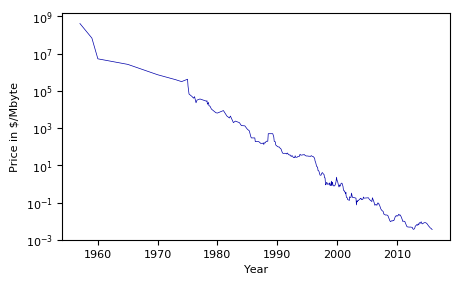

In [11]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

### Part A
Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

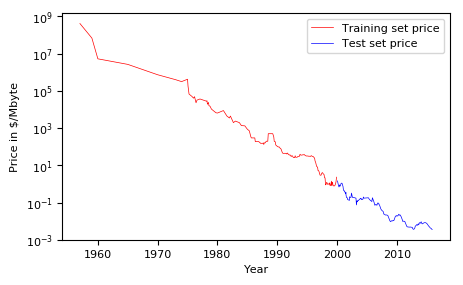

In [46]:
train_data = ram_prices[ram_prices.date < 2000]
test_data = ram_prices[ram_prices.date > 2000]
ram_prices = pd.read_csv('data/ram_price.csv')

_ = plt.semilogy(train_data.date, train_data.price, 'r-', test_data.date, test_data.price, 'b-')
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte");
_ = plt.legend(("Training set price", "Test set price"))

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clfs = [
    ('Linear regression', LinearRegression()),
    ('Decision tree', DecisionTreeRegressor()),
    ('Random forest', RandomForestRegressor()),
]

# Fit clfs
for (clf_name, clf) in clfs:
    _ = clf.fit(train_data.date.reshape(-1, 1), train_data.price)
    clf_score = clf.score(test_data.date.reshape(-1, 1), test_data.price)
    print("{}, R^2: {}".format(clf_name, clf_score))

Linear regression, R^2: -6172151460522165.0
Decision tree, R^2: -60.46183638700723
Random forest, R^2: -37.53710804721013


#### Results of the $R^2$ scores
The random forest gives the best $R^2$ score. However, all of these three classifiers have very low results. 

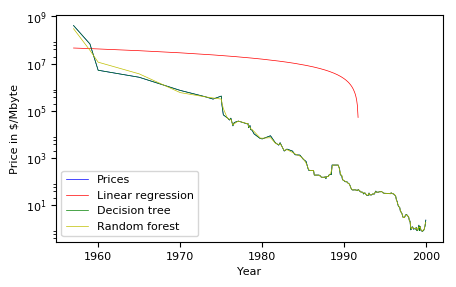

In [48]:
colors = {
    'Linear regression': 'r-',
    'Decision tree': 'g-',
    'Random forest': 'y-',
}


args = []

for (clf_name, clf) in clfs:
    _ = args.append(train_data.date)
    _ = args.append(clf.predict(train_data.date.reshape(-1, 1)))
    _ = args.append(colors[clf_name])


_ = plt.semilogy(train_data.date, train_data.price, 'b-', *args)
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")
_ = plt.legend(('Prices', 'Linear regression', 'Decision tree', 'Random forest'))

#### Plot results training set
- The decision tree and random forest regressor seem to overfit the data. 
- The linear regression regressor has a lot of problems with the dataset, since the expected function is exponential, and not linear. 

To get a better result of the linear regression, the data should be rescaled or polynomial features should be added, such that there is a linear relation. 

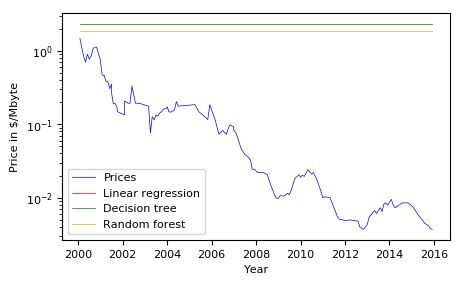

In [49]:
# Plot on test data

colors = {
    'Linear regression': 'r-',
    'Decision tree': 'g-',
    'Random forest': 'y-',
}

args = []

for (clf_name, clf) in clfs:
    _ =args.append(test_data.date)
    _ =args.append(clf.predict(test_data.date.reshape(-1, 1)))
    _ =args.append(colors[clf_name])

_ = plt.semilogy(test_data.date, test_data.price, 'b-', *args)
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")
_ = plt.legend(('Prices', 'Linear regression', 'Decision tree', 'Random forest'))

#### Plot results test set
All three predictors do not give a meaningful result. 
- Again, the linear model cannot follow the exponential path of the data.
- The other two predictors gave very good results on the trainingset. However, they seemed to overfit the data. And this picture shows that. The two predictors have trouble to predict data points outside the range they have seen. This is not suprising, since this is an inherit problem of tree classifiers when used on regression. 

### Part B
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add a few more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

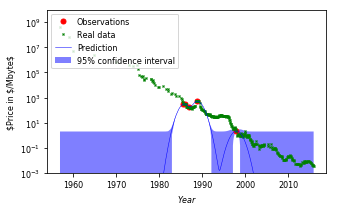

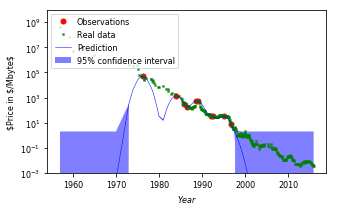

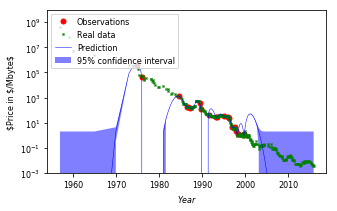

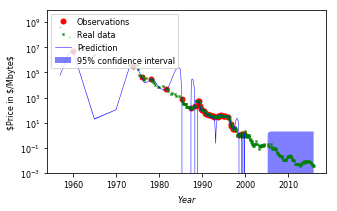

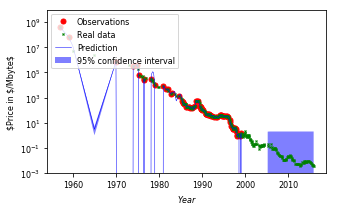

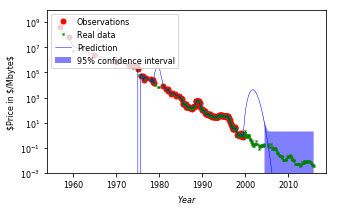

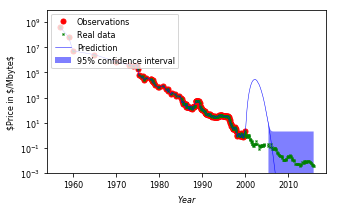

In [84]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split


# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(1970, 2010, 1000)).T
x = ram_prices.date.reshape(-1, 1)

for i in [5, 10, 20, 40, 80, 150, 202]: # 202 is full 

    if i != 202:
        X, _, y, _= train_test_split( train_data.date.reshape(-1, 1),
                                 train_data.price.ravel(),
                                 train_size=i)
    else:
        X = train_data.date.reshape(-1, 1)
        y = train_data.price.ravel()

    gp = GaussianProcessRegressor()

    # Fit to data using Maximum Likelihood Estimation of the parameters
    _ = gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    _ = plt.ylim(10**-3, 10**10)
    _ = plt.semilogy(X, y, 'r.', markersize=10, label=u'Observations')
    _ = plt.semilogy(x, ram_prices.price.ravel(), 'gx', markersize=2, label=u'Real data')
    _ = plt.plot(x, y_pred, 'b-', label=u'Prediction')
    _ = plt.yscale('log')
    _ = plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
    _ = plt.xlabel('$Year$')
    _ = plt.ylabel('$Price in $/Mbyte$')
    _ = plt.legend(loc='upper left')

In [33]:
from sklearn.metrics import r2_score

X = ram_prices.date.reshape(-1, 1)
y = ram_prices.price.ravel()

gp = GaussianProcessRegressor()

# Fit to data using Maximum Likelihood Estimation of the parameters
_ = gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred =  gp.predict(x)

r2 = r2_score(y, y_pred)

print("r^2 score: {}".format(r2))

r^2 score: 0.9999999984788437


### Results
The $R^2$ score is very high, but this is due to overfitting. In the pictures above we can see that the predictor gives very good results for the datapoints that it has encountered. However, for datapoints that are outside the range of the datapoints, the classifier tends to predict very low results. Even when there is a gap between two datapoints, the classifier seems to like very low values. 

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145676: http://www.openml.org/t/145676
    - The dataset description can be found here: http://www.openml.org/d/4537
- A leaderboard is kept of the best models: http://www.openml.org/t/145676#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

### Summary
*Note:* We have tried many grid searches in many different steps to optimize different hyperparameters. Since showing them all would result in way too much clutter and code, we will just give the code for the final algorithms with the hyperparameters used for each step. 

*Note 2:* The code for the actual submissions to OpenML isn't shown here. In the actual code we added `n_jobs=-1` to the VotingClassifier for a speedup with the OpenML task functions.

*Note 3:* We generally tested with a different seed and `cv=10` for the majority of our classifiers to avoid a full overfit on the cv split of the task. But to have an as close representation as possible to the OpenML scores, we will use the `cv=task.iterate_all_splits()` here.

1. We first started with the KNN classifier to get an idea of the data, as well as to get a rough estimate on how well we could perform on the data set using a simple and fast classifier. The optimal KNN that we found will be shown below.
2. Then we tried an SVM classifier and got higher results. These parameters were optimized as well. The best SVM we found will be shown in the second part. We used a similar pipeline as 
3. Since the highscore of OpenML.org showed that trees performed exceptionally well on this data, we tried various different forest classifiers, namely the `RandomForestClassifier`, the `ExtraRandomClassifier` and the `GradientBoostingClassifier`, which all gave promising results. Here, we removed the `k-best` feature selection from the preprocessing and instead added them to the classifiers themselves. Note that for this point, as well as for 5, 6, 7 and 8, we still have the `StandardScaler()` in the pipeline while the trees technically don't need this. In some of our tests this surprisingly improved our performance, and it wouldn't harm to include it either way.
4. We tried to look for a different algorithm not involving trees that could perform well to add to our voting classifiers. We looked at the neural networks libary of Sklearn, but after a lot of finetuning of the hyperparameters, we could not get a good score in an acceptable time.
5. The goal was to find another classifier which could boost the performance of our Voting classifier. XGBoost had some good scores and after optimizing, the tree itself neared an AUC score of 0.88.
6. Here we added the XGBoost to our best voting classifier for an improved score.
7. This classifier the same classifier in 6, but with three classifiers as OpenML had a bug with submitting votingclassifiers with the PythonAPI. After a workaround we could only submit a maximum of three classifiers.
8. Here is our final classifier which is a slight optimization of 7, and scores 0.8866 in OpenML.

Other things we tried included using multiple of the same trees, such as using 20 random forests with the same hyperparameters. This improved the score, but not by a lot. Another thing we tried was adding trees with multiple criterion, but this also did not improve the score as much. Finally, various other things were tried but weren't so effective (different Scalers, using PCA / other preprocessors, Bayesian hyperparameter search, Gaussian processes, Polynomial features).

In [53]:
from openml import tasks, runs

task = tasks.get_task(145677)

X, y = task.get_X_and_y()

from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import xmltodict
import xgboost as xgb

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1. KNN classifier
This is our inital classifier which runs fast and has an easy hyperparameter to tune on. This was the best KNN classifier we found using a GridSearch. The score did not seem all that great if you compare it to the classifiers on OpenML.org, but the score is not necessarily bad.

In [ ]:
clf_pipe = Pipeline([('scaling', StandardScaler()),
                     ('selector', GenericUnivariateSelect(mode='k_best', param=170)),
                     ('knn', KNeighborsClassifier(
                         n_jobs=-1, leaf_size=1, n_neighbors=10, algorithm='brute')
                     )
                    ])

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 2. SVM
As we can see from the results below, using the SVM already resulted in a higher `ROC_AUC` score, indicating that the KNN classifier would not be the right classifier for this task. Unfortunately, after experimenting with voting classifiers with some of the tree classifiers below, we could not find any use for the SVM in our final classifier, but the score still is not that bad.

In [ ]:
clf_pipe = Pipeline([('scaling', StandardScaler()),
                     ('selector', GenericUnivariateSelect(mode='k_best', param=170)),
                     ('svc', SVC(
                         probability=True,
                         kernel='rbf',
                         C=1.40,
                         gamma=0.014
                        ))
                    ])

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 3. Some forest classifiers + voting classifier
Here, we will summarise the different tree classifiers we have found. The hyperparameters were found with a mix of trial-and-error, looking at the previous submissions of OpenML and grid search. We found, as an example, using a grid search that `max_features=sqrt` performs surprisingly well with the tree classifiers.

In [ ]:
# Extra random trees classifier
etc = ExtraTreesClassifier (
    n_estimators=1024, 
    criterion='entropy', 
    bootstrap=True, 
    max_features="sqrt", 
    min_samples_leaf=2
)

clf_pipe = make_pipeline (
    StandardScaler(),
    etc
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

In [ ]:
# Random forest classifier
rfc = RandomForestClassifier (
    n_estimators=1024, 
    n_jobs=1,
    max_features=0.1, 
    criterion='entropy', 
    bootstrap=True, 
    min_samples_leaf=2
)

clf_pipe = make_pipeline (
    StandardScaler(),
    rfc
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

In [ ]:
# Gradient Boosting classifier
gbc = GradientBoostingClassifier (
    n_estimators=1024, max_depth=8, learning_rate=0.01 , max_features="sqrt", min_samples_leaf=2
)

clf_pipe = make_pipeline (
    StandardScaler(),
    gbc
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

In [ ]:
# Voting classifier with previous 3 combined.
etc = ExtraTreesClassifier (
    n_estimators=1024, 
    criterion='entropy', 
    bootstrap=True, 
    max_features="sqrt", 
    min_samples_leaf=2
)

rfc = RandomForestClassifier (
    n_estimators=1024, 
    n_jobs=1,
    max_features=0.1, 
    criterion='entropy', 
    bootstrap=True, 
    min_samples_leaf=2
)

gbc = GradientBoostingClassifier (
    n_estimators=1024, max_depth=8, learning_rate=0.01 , max_features="sqrt", min_samples_leaf=2
)

clf_vot = VotingClassifier(
            [
                ('etc', etc),
                ('rfc', rfc),
                ('gbc', gbc),

            ], voting='soft', n_jobs=-1)

clf_pipe = make_pipeline (
    StandardScaler(),
    clf_vot
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 4. Neural Network
All the different kind of trees gave a very nice and high result. However, we wanted to look for a different classifier and see if this would result in another high score that would differ from the trees. 

The reason behind it would be as follows: if we have two different kind of algorithms that make mistakes on different parts of the data, then the voting classifier could be used to improve the data by a lot.

Sadly, the neural network didn't score that high. And when we tried to test it within the voting classifier, the scoring didn't seem to improve.

A small note: using larger hidden layers would result in lower scores. This would indicate that we wouldn't have enough time to train the neural network to its full potential (hence the SGD complains about it). This could be resolved by using GPU-accelerated Neural Networks to improve the score.

In [ ]:
clf_pipe = Pipeline(
       [
               ('scaling', StandardScaler()),
               ('selector', GenericUnivariateSelect(mode='k_best', param=250)),
               ('nn', MLPClassifier(
                           hidden_layer_sizes=(40),
                           activation='relu', 
                           solver='sgd',
                           alpha=0.3,
                           learning_rate='adaptive',
                           max_iter=300,
                           verbose=0
                           )
               )
       ]
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 5. XGBoost classifier
We wanted to add another classifier to our voting classifier. Since the boosting classifier performed really well, we looked at the the XGBoost classifier, which should perform similar if not better. To find the best hyperparameters of the XGBoost, we followed [these guidelines](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) (with less `n_estimators` as that would take too long). Initially the score of the XGBoost wasn't all that great (0.85), but after some finetuning we got to levels near our GradientBoostingClassifier.

To summarise the webpage, we fixed 1 or 2 parameters every time while doing a rough grid search on them. When we found the optimal value, we did a gridsearch with the same hyperparameters, but with more finegrained values. 

In [ ]:
xgb = xgb.XGBClassifier (
        n_estimators=1024, 
        max_depth=8, 
        silent=True, 
        objective="binary:logistic",
        learning_rate=0.03,
        min_child_weight=2,
        nthread=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.9,
        reg_lambda=1,
        reg_alpha=0
)

clf_pipe = make_pipeline (
    StandardScaler(),
    xgb
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 6. Voting classifier with 4 trees 

Here, we added our XGBoost to our classifier for a performance boost, finally increasing our scores again.

In [ ]:
etc = ExtraTreesClassifier (
    n_estimators=1024, 
    criterion='entropy', 
    bootstrap=True, 
    max_features="sqrt", 
    min_samples_leaf=2
)

rfc = RandomForestClassifier (
    n_estimators=1024, 
    n_jobs=1,
    max_features=0.1, 
    criterion='entropy', 
    bootstrap=True, 
    min_samples_leaf=2
)

gbc = GradientBoostingClassifier (
    n_estimators=1024, max_depth=8, learning_rate=0.03 , max_features="sqrt", min_samples_leaf=2
)

xgb = xgb.XGBClassifier (
        n_estimators=1024, 
        max_depth=8, 
        silent=True, 
        objective="binary:logistic",
        learning_rate=0.03,
        min_child_weight=2,
        nthread=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.9,
        reg_lambda=1,
        reg_alpha=0
)

clf_vot = VotingClassifier(
            [
                ('etc', etc),
                ('rfc', rfc),
                ('gbc', gbc),
                ('xgb', xgb)

            ], voting='soft')

clf_pipe = make_pipeline (
    StandardScaler(),
    clf_vot
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 7. Voting classifier with 3 different trees
Due to a bug in OpenML, we had to use some tricks to get our voting classifier working on the website using the Python API. Accoring to [this issue](https://github.com/openml/openml-python/issues/209) on Github, we had to resort to renaming the parameters to the hyperparameters of the voting classifier. However, it only worked for us with a maximum of 

In [ ]:
rfc = RandomForestClassifier (
    n_estimators=1024, 
    n_jobs=1,
    max_features=0.1, 
    criterion='entropy', 
    bootstrap=True, 
    min_samples_leaf=2
)

gbc = GradientBoostingClassifier (
    n_estimators=1024, max_depth=8, learning_rate=0.03 , max_features="sqrt", min_samples_leaf=2
)

xgb = xgb.XGBClassifier (
        n_estimators=1024, 
        max_depth=8, 
        silent=True, 
        objective="binary:logistic",
        learning_rate=0.03,
        min_child_weight=2,
        nthread=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.9,
        reg_lambda=1,
        reg_alpha=0
)

clf_vot = VotingClassifier(
            [
                ('voting', rfc),
                ('weights', gbc),
                ('n_jobs',  xgb)

            ], voting='soft')

clf_pipe = make_pipeline (
    StandardScaler(),
    clf_vot
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())

### 8. Results and final classifier
With our last classifier, we got a result in OpenML of 0.8852, which was a new highscore and an improvement of 0.0010 over the last classifier (which was a single optimized random forest), ignoring the classifiers that used the bug of `warm_start=1`. Here's a screenshot of this (look for Joost Visser's score):
![New highscore](new-highscore.png)

We could probably improve the scores even further if we tune the hyperparameters (especially the `learning_rate` of the boosting trees and the `weights` of the voting classifier) better, add more estimators to the trees, as well as adding the fourth ExtraTreeClassifier to the voting classifier. However, this will take a lot of time and the performance gains wouldn't be so great.

What now follows is our final submission to OpenML after reducing the learning rate of the boosting trees a bit, which resulted in a score of 0.8866 on OpenML.

In [ ]:
rfc = RandomForestClassifier (
    n_estimators=1024, 
    n_jobs=1,
    max_features=0.1, 
    criterion='entropy', 
    bootstrap=True, 
    min_samples_leaf=2
)

gbc = GradientBoostingClassifier (
    n_estimators=1024, max_depth=8, learning_rate=0.02 , max_features="sqrt", min_samples_leaf=2
)

xgb = xgb.XGBClassifier (
        n_estimators=1024, 
        max_depth=8, 
        silent=True, 
        objective="binary:logistic",
        learning_rate=0.02,
        min_child_weight=2,
        nthread=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.9,
        reg_lambda=1,
        reg_alpha=0
)

clf_vot = VotingClassifier(
            [
                ('voting', rfc),
                ('weights', gbc),
                ('n_jobs',  xgb)

            ], voting='soft')

#New record! 0.8866 on OpenML
clf_pipe = make_pipeline (
    StandardScaler(),
    clf_vot
)

a = cross_val_score(clf_pipe, X, y, cv=task.iterate_all_splits(), scoring='roc_auc', n_jobs=5, verbose=3)
print(a, a.mean())